# PRISMA Flow Diagram

In [2]:
from msc_code.scripts.notebook_setup import *

TypeError: 'Axes' object is not callable

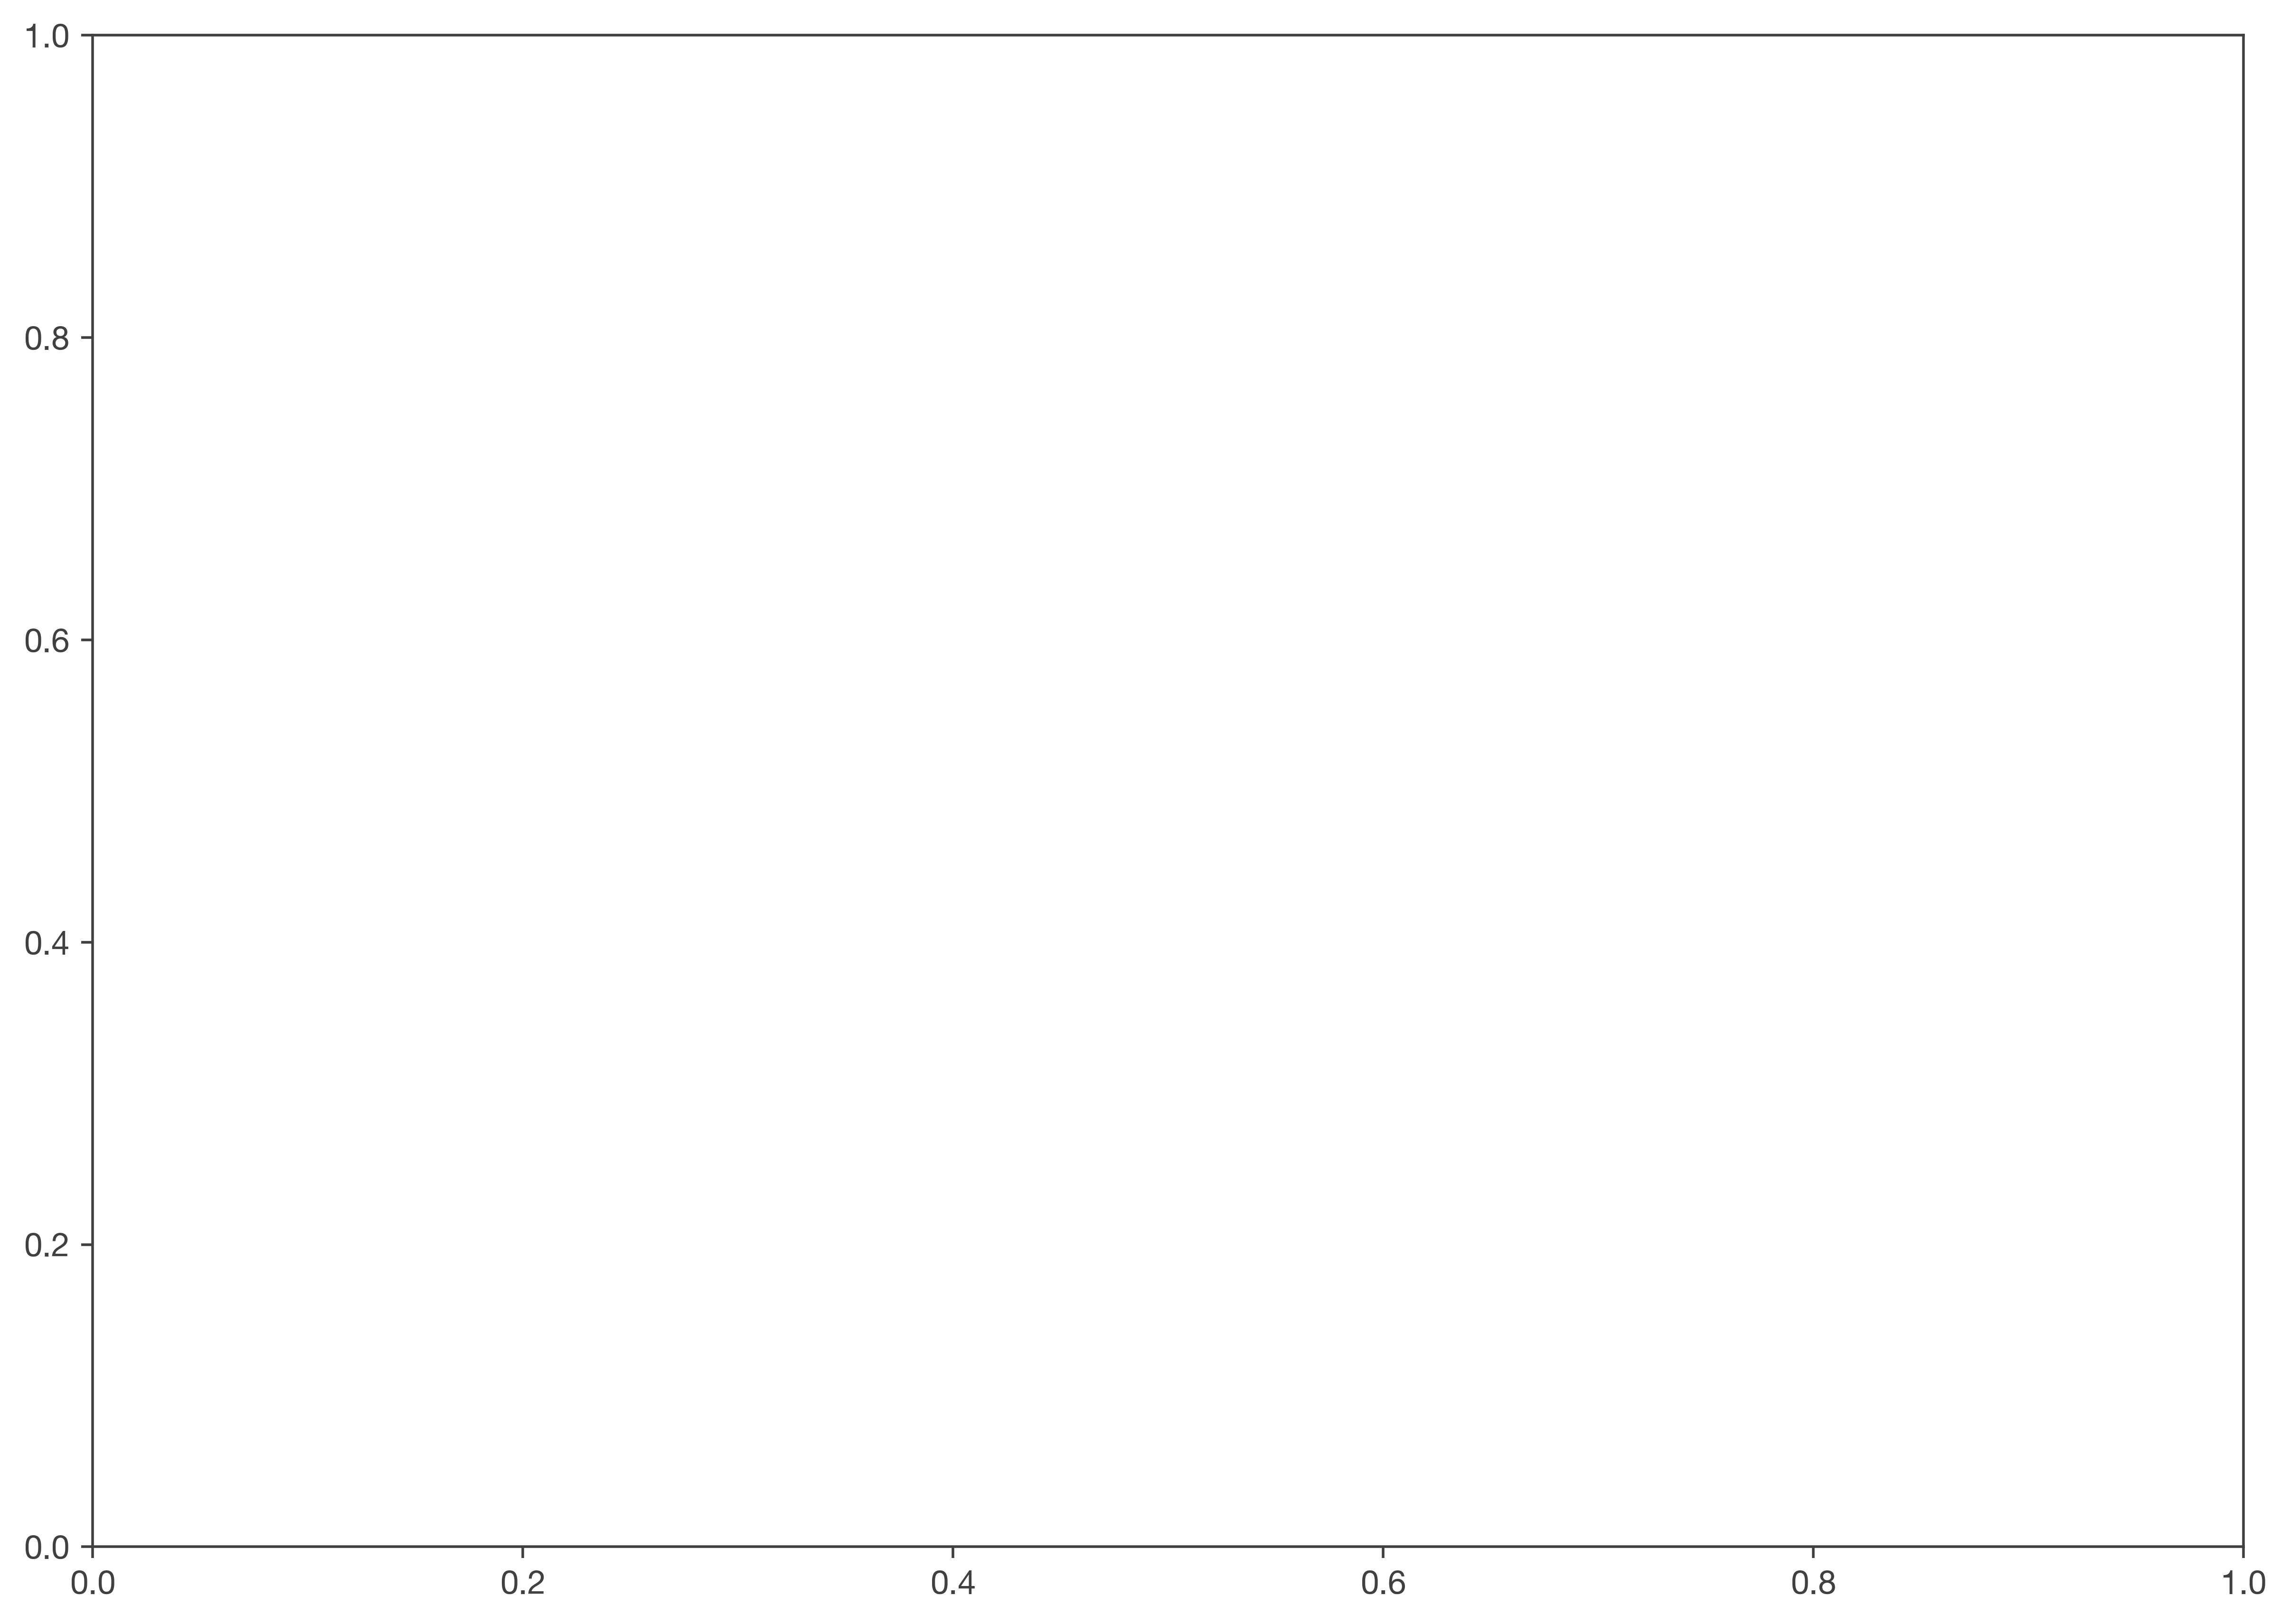

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

fig, ax = plt.subplots(figsize=(8, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 14)
ax.axis('off')

# Helper function
def draw_box(ax, xy, text, width=8, height=1.2):
    x, y = xy
    rect = Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=1.5)
    ax.add_patch(rect)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center', wrap=True, fontsize=10)

def draw_arrow(ax, xy_from, xy_to):
    x1, y1 = xy_from
    x2, y2 = xy_to
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', lw=1.5))

# Example PRISMA flow
draw_box(ax, (1, 12), 'Records identified through database searching (n = 1000)')
draw_arrow(ax, (5, 12), (5, 10.8))
draw_box(ax, (1, 10), 'Records after duplicates removed (n = 800)')
draw_arrow(ax, (5, 10), (5, 8.8))
draw_box(ax, (1, 8), 'Records screened (n = 800)')
draw_arrow(ax, (5, 8), (5, 6.8))
draw_box(ax, (1, 6), 'Records excluded (n = 600)')
draw_arrow(ax, (5, 6), (5, 4.8))
draw_box(ax, (1, 4), 'Full-text articles assessed for eligibility (n = 200)')
draw_arrow(ax, (5, 4), (5, 2.8))
draw_box(ax, (1, 2), 'Studies included in qualitative synthesis (n = 50)')

plt.tight_layout()
plt.show()

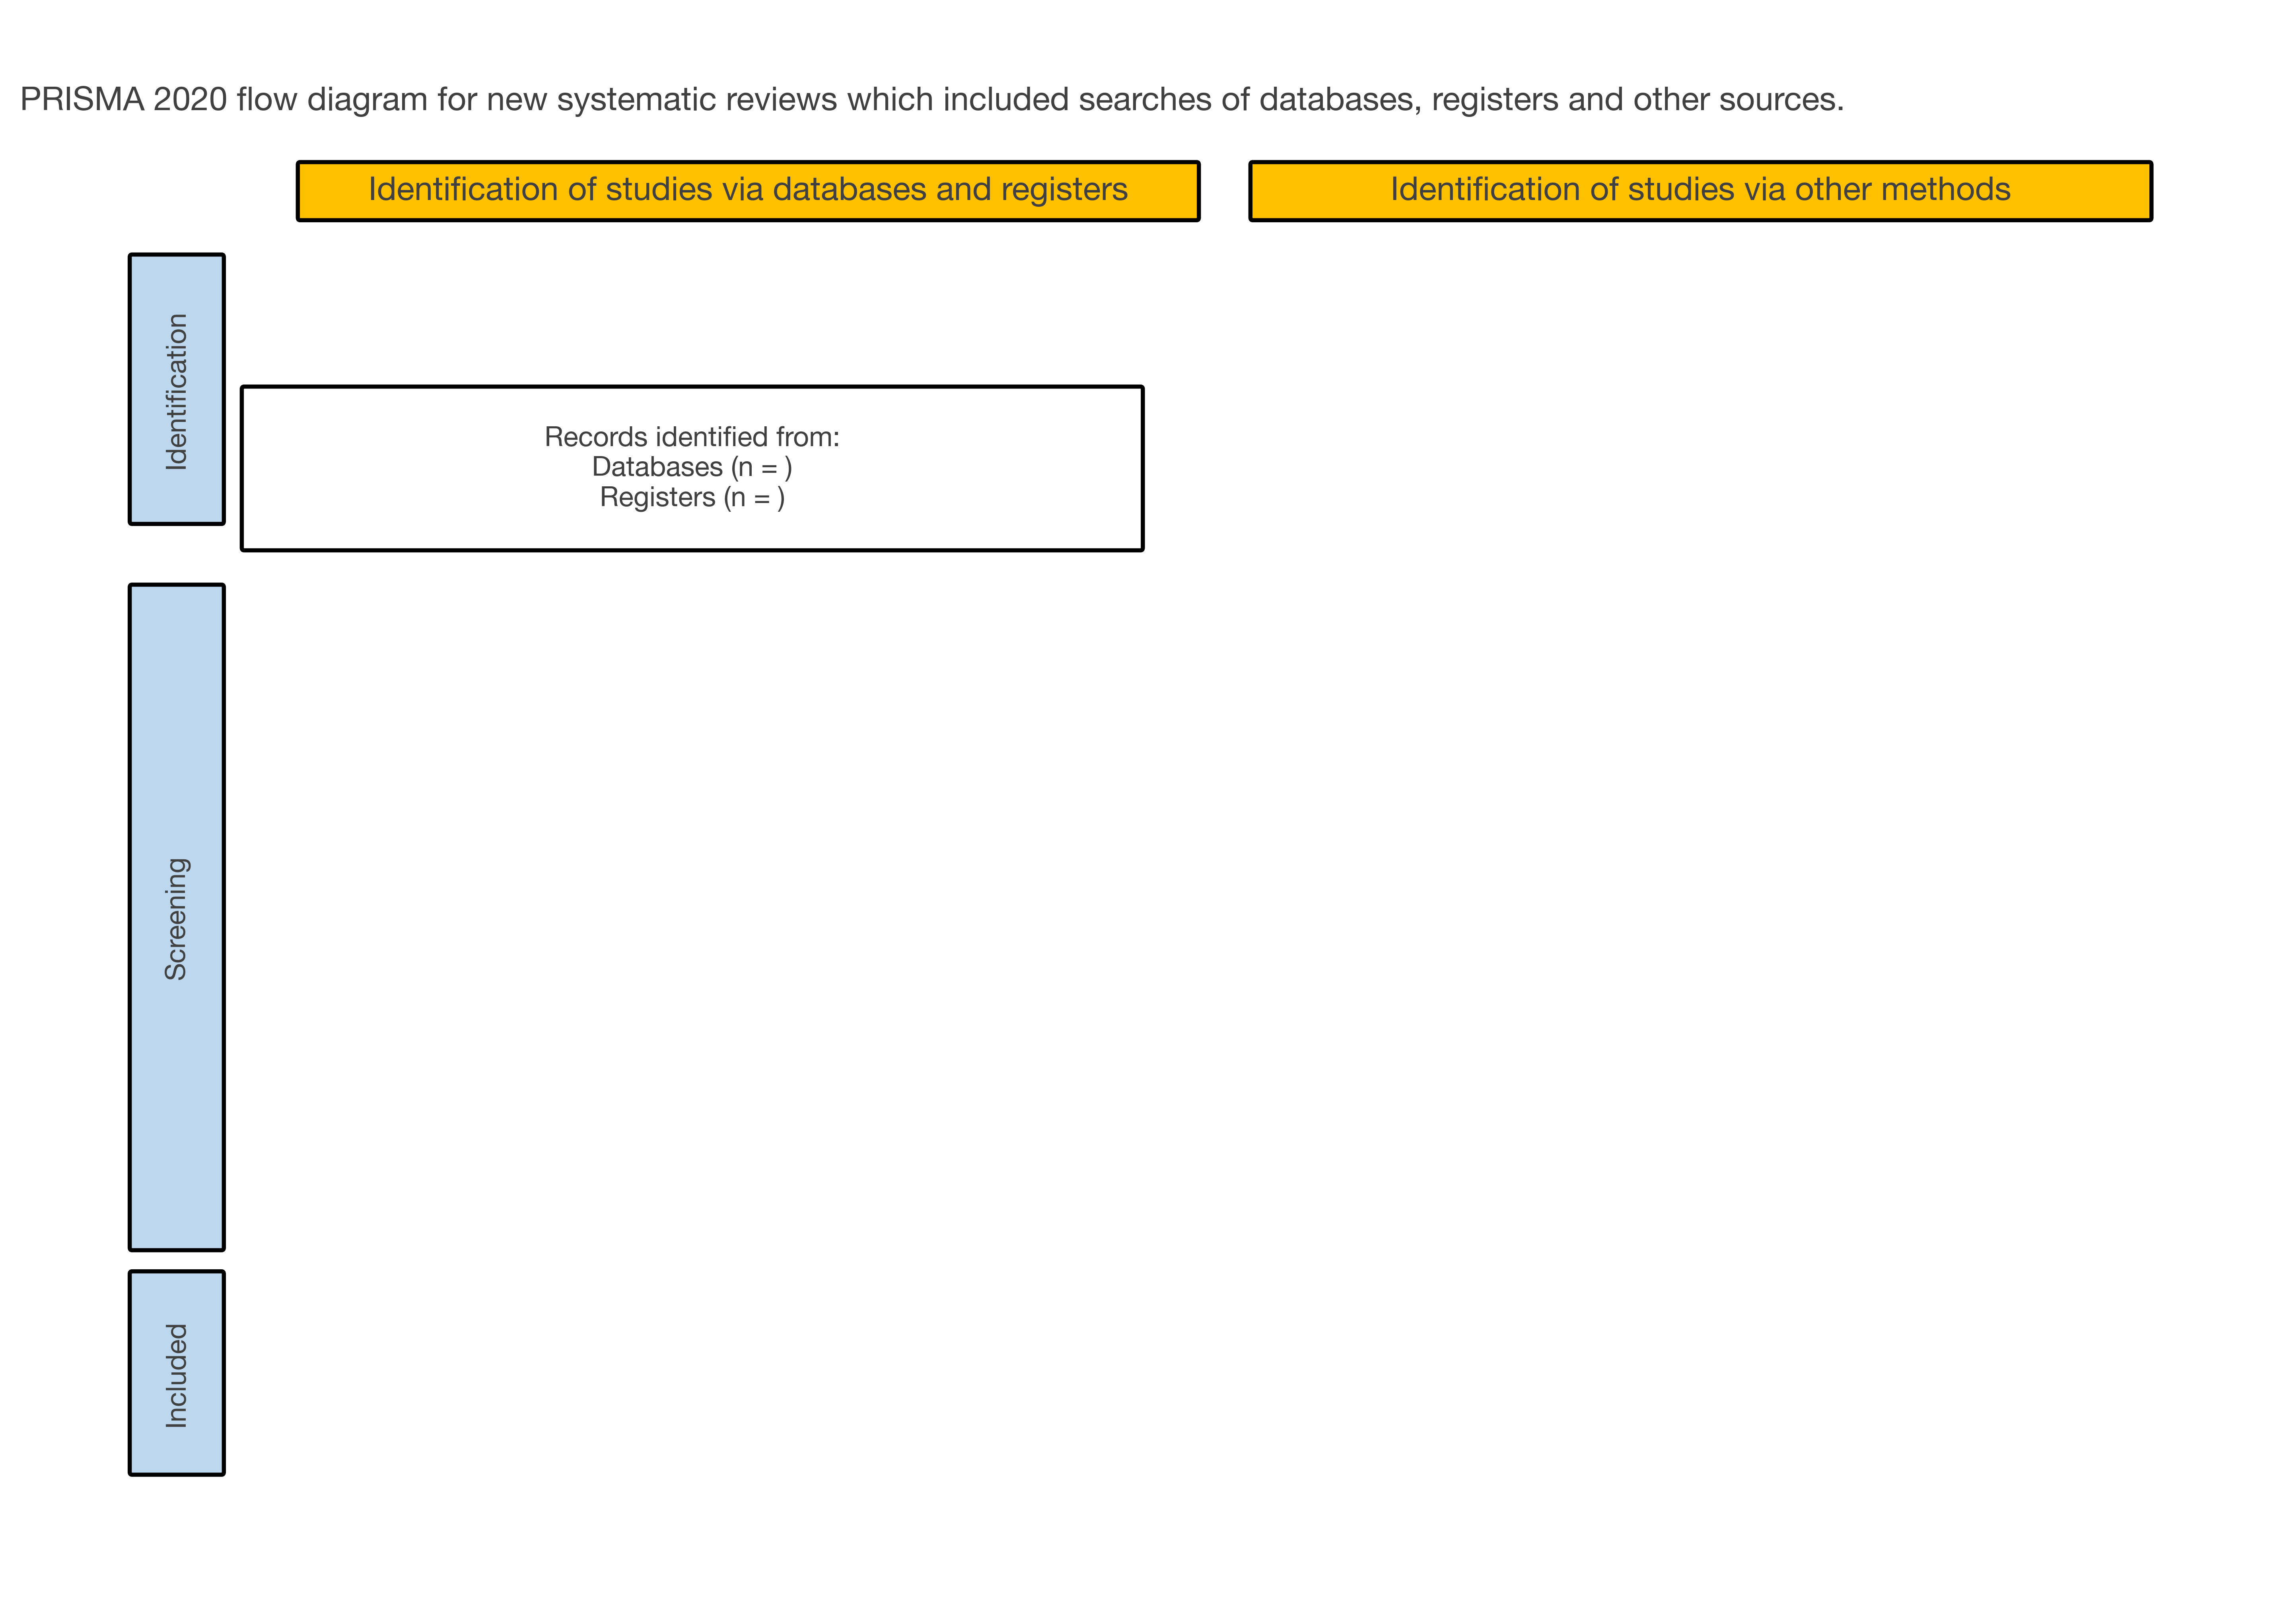

In [58]:
from matplotlib.patches import FancyBboxPatch

# A4 landscape size
fig, ax = plt.subplots(figsize=(11.69, 8.27))
ax.axis('off')

# Set axis limits
ax.set_xlim(0, 20)
ax.set_ylim(0, 12)

# Draw title in top-left corner (using ax.text instead of suptitle)
ax.text(0, 11.5, 
        "PRISMA 2020 flow diagram for new systematic reviews which included searches of databases, registers and other sources.",
        fontsize=12, fontweight='bold', ha='left', va='top')

# Function to draw yellow header box
def draw_yellow_box(ax, x, y, width, height, text, fontsize=12):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#FFC000",
        linewidth=1.5
    )
    ax.add_patch(box)
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center',
        fontsize=fontsize, fontweight='bold'
    )

# Draw first yellow header box below the title
draw_yellow_box(ax, x=2.5, y=10.5, width=8, height=0.4, 
                text="Identification of studies via databases and registers")

# Draw second yellow box beside it
draw_yellow_box(ax, x=11, y=10.5, width=8, height=0.4,
                text="Identification of studies via other methods")

def draw_vertical_blue_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#BDD7EE",  # Light blue (similar to PRISMA)
        linewidth=1.5
    )
    ax.add_patch(box)
    
    # Rotated text (90 degrees, bottom to top)
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        rotation=90,  # rotate 90 degrees counterclockwise
        fontsize=fontsize, fontweight='bold'
    )

draw_vertical_blue_box(ax, x=1, y=8.2, width=0.8, height=2, text="Identification")
draw_vertical_blue_box(ax, x=1, y=2.7, width=0.8, height=5, text="Screening")
draw_vertical_blue_box(ax, x=1, y=1, width=0.8, height=1.5, text="Included")

def draw_white_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="white",
        linewidth=1.5
    )
    ax.add_patch(box)
    
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize
    )

draw_white_box(ax, x=2, y=8, width=8, height=1.2, 
               text="Records identified from:\nDatabases (n = )\nRegisters (n = )")

plt.tight_layout()
plt.show()